**Note**: This is not an actual tutorial, but a scribbling pad initially I used to understand from ground up, the search algorithm from programming perspective. How do I store and calculate the changing cost variable. So rather than having an algorithm upfront, I first understood how to use priority queue in python and then things automatically got in place. Even if you are not familiar with UCS yet, below framework could still be understandable.

## Priority Queue basics

1. Create a simple priorioty queue and use it

In [1]:
from queue import PriorityQueue
q = PriorityQueue()

In [2]:
q.empty()

True

**Note:** Always enter the tuple in priority queue first element being priority value and second the actual value

In [3]:
q.put((3, 'python'))
q.put((4,'java'))
q.put((2, 'ruby'))
q.put((2,'golang'))  #Note I am also testing what happens when 2 or more elements have same prio

In [4]:
q.empty()

False

**Storing and retrieval of simple data:**  

In [5]:
while not q.empty():
    print(q.get())

(2, 'golang')
(2, 'ruby')
(3, 'python')
(4, 'java')


**Note:** Calling q.get() or q.get(False) when q is empty, makes ipython kernel hang. **Always check if Q is empty before accessing**

**Storing and retrieval of lists with priority info:**  
Let us try to store a list (as we might later need to store paths of lowest cost, cost as priority)

In [9]:
q.queue.clear()
q.put((3, ['A','S']))
q.put((4,['A','Z']))
q.put((2, ['A','T']))
q.put((2,['A','S','F']))
q.put((float('inf'),['A'])) #A path to itself represented with infinity for lowest priority

In [10]:
while not q.empty():
    cost, path = q.get()
    print('cost: {} path: {} pathEndNode: {}'.format(cost,path,path[-1]))

cost: 2 path: ['A', 'S', 'F'] pathEndNode: F
cost: 2 path: ['A', 'T'] pathEndNode: T
cost: 3 path: ['A', 'S'] pathEndNode: S
cost: 4 path: ['A', 'Z'] pathEndNode: Z
cost: inf path: ['A'] pathEndNode: A


qsize could give you the current size of the queue

In [11]:
q.qsize()

0

## Uniform Cost Search

Let us now try a map. For now, we just try to inject a node info and its' neighbors info in the pQ
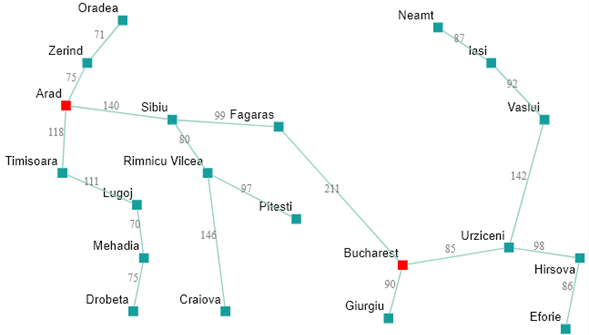
<small>Code to generate above map could be found <a href="https://www.codepile.net/pile/JZlJjyrK">here</a></small>

In [12]:
#storing above map info first as a dictionary..
romania_nodes_map = {
        'A': [(140,'S'), (118,'T'), (75,'Z')],
        'S': [(99,'F'), (80,'RV')],
        'T': [(111,'LU')],
        'Z': [(71,'O')],+
        'F': [(211,'B')],
        'B': [(90,'G'),(85,'U')],
        'U':[(98,'H'),(142,'V')],
        'V':[(92,'LA')],
        'LA':[(87,'N')],
        'RV':[(146,'C'),(97,'P')],
        'LU':[(70,'M')],
        'M':[(75,'D')],
        'H':[(86,'E')]
        }

Let us initialize the queue with start position..

In [13]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start)) #single node path to itself represented with 0 as it incurs no cost..

#test
list(q.queue)  #to just peek queue elements without removing them..

[(0, 'A')]

1. Take out path with least cost off the queue (which, queue will do for us, we just ensure both cost/prio and path fed to queue)
2. Get the end node. Is it goal? If so, later we will celebrate this moment!
3. If not, take end node's kids. Create path from end node to each of kid. Store **total cost** and **path from current node to kid node** in the queue

In [11]:
current_cost, current_path = q.get() #cost is 0, path is ['A']
current_node = current_path[-1]      #this should give us 'A'

#'A' is not goal 'B' so..

for each_children in romania_nodes_map.get(current_node, []):
    q.put((current_cost + each_children[0], each_children[1]))

#test
list(q.queue)

[(75, 'Z'), (140, 'S'), (118, 'T')]

Once more.. 

1. Take out path with least cost off the queue (which queue will do for us, we just ensure both cost/prio and path fed to queue)
2. Get the end node. Is it goal? If so, later we will celebrate this moment!
3. If not, take end node's kids. Create path from end node to each of kid. Store **total cost** and **path from current node to kid node** in the queue

In [12]:
current_cost, current_path = q.get() #cost is inf, path is ['A']
current_node = current_path[-1]      #this should give us 'A'

#'A' is not goal 'B' so..

for each_children in romania_nodes_map.get(current_node, []):
    q.put((current_cost + each_children[0], each_children[1]))

#test
list(q.queue)

[(118, 'T'), (140, 'S'), (146, 'O')]

We will again run below steps, but now in a loop till Q gets emptied. Also we exit with path any moment, when goal is detected.  

while Q is not empty:
1. Take out path with least cost off the queue (which queue will do for us, we just ensure both cost/prio and path fed to queue)
2. Get the end node. Is it goal? If so, declare celebration!
3. If not, take end node's kids. Create path from end node to each of kid. Store **total cost** and **path from current node to kid node** in the queue

In [13]:
while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == 'B'): 
        break 

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))

    #test
    list(q.queue)

print(current_cost, current_path)

450 B


Below is the path that the code we just developed found. Add up the total cost <span style="color:red">140+99+211 = 450 !!</span>  

Yahoo!! We just almost done a uniform cost search algorithm.  
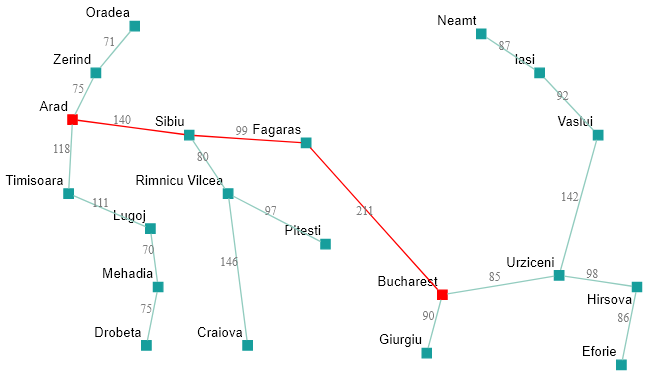

Hmm., ok, we got cost, but where is the path as result? How do I know its from A to S to F to B?  

Let us try recording parent info ('cameFrom') every time we add new kids to the queue. Then once we exit, we just back track as below. Before that, just a small recap, as a whole snippet..

In [14]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start))

while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == goal): 
        break 

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))

    #test
    list(q.queue)

print(current_cost, current_node)

450 B


Ok, it works! Good to go. Let us record parent info..
1. We initialize ```cameFrom[start]``` as None as that is our starting point. Food for thought. Why? 
2. Every iteration of adding kid's to queue, we also record current node as that kid's parent   ```cameFrom[kid]=current_node```  
3. Once we are out of loop, we could simply backtrack. For now, lets hardcode steps for backtrack and then we wrap it in a loop.

In [15]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start))
cameFrom = {}           #note its a dict, not list caz key needed as string. Its 'kid':'papa'
cameFrom[start] = None  #caz its a starting point in our virtual tree of search!! No papa.

while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == goal): 
        break 

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))
        cameFrom[each_children[1]]=current_node

    #test
    list(q.queue)

print(current_cost, current_node)

450 B


In [16]:
path = [current_node]

current_node = cameFrom[current_node]
path.append(current_node)

current_node = cameFrom[current_node]
path.append(current_node)

current_node = cameFrom[current_node]
path.append(current_node)

current_node = cameFrom[current_node]
path.append(current_node)

path

['B', 'F', 'S', 'A', None]

Definitely this is not the way as we do not know how many times to execute  
```
current_node = cameFrom[current_node]
path.append(current_node)
```
So we just make it in a loop. We could just exit when we reach parent as None. Wrapping it in a loop and adding to main module..

In [17]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start))
cameFrom = {}           #note its a dict, not list caz key needed as string. Its 'kid':'papa'
cameFrom[start] = None  #caz its a starting point in our virtual tree of search!! No papa.

while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == goal): 
        break 

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))
        cameFrom[each_children[1]]=current_node

    #test
    list(q.queue)

print(current_cost, current_node)
path = [current_node]
while current_node != None:   #when current_node is not None..
    current_node = cameFrom[current_node]
    path.append(current_node)
print(current_cost, path[:-1])  #we do not want None in the path so..

450 B
450 ['B', 'F', 'S', 'A']


The path is correct, but its in reverse. We just reverse it again.. 

In [18]:
print(current_cost, [x for x in reversed(path[:-1])])

450 ['A', 'S', 'F', 'B']


Voila! We just finished "Uniform Cost Search" :)

The problem we solved is a **tree** problem. There were no closed loops. Typically this is not the case. We will often have closed loops in real world. In that case, applying same search algorithm would result in infinite loop. Check the map below. When you take child info of "S", you are currently considering all children. In closed loop map as below, you would thus also consider "A" which we already **visited**. This would thus result in a dead loop. 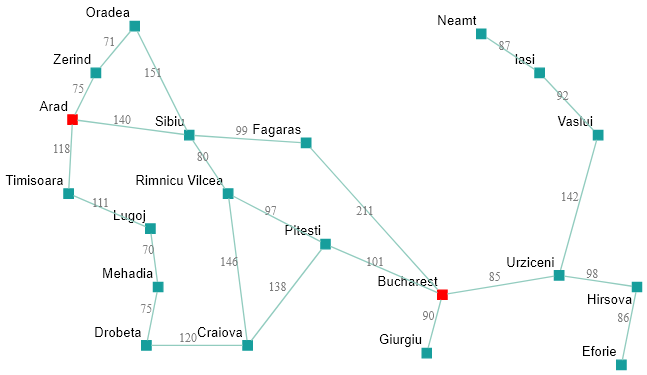  
<small>Code for above map could be found <a href="https://www.codepile.net/pile/qxyDMWj2">here</a></small>

The solution is seemingly simple. We simply do not consider adding a node who had been visited already. 

By the way, trees with closed loops are called **Graphs**. Or usually, "Tree" is a special form of **Graphs** without any closed loops. 

Integrating "closedSet" in our main module..

In [23]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start))
cameFrom = {}           #note its a dict, not list caz key needed as string. Its 'kid':'papa'
cameFrom[start] = None  #caz its a starting point in our virtual tree of search!! No papa.
closedSet = set()  # set() would be better than a list?

while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == goal): 
        break 
    else:
        closedSet.add(current_node)

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))
        cameFrom[each_children[1]]=current_node

    #test
    list(q.queue)

print(current_cost, current_node)
path = [current_node]
while current_node != None:   #when current_node is not None..
    current_node = cameFrom[current_node]
    path.append(current_node)
print(current_cost, [x for x in reversed(path[:-1])])

450 B
450 ['A', 'S', 'F', 'B']


Let us test it for the given map..
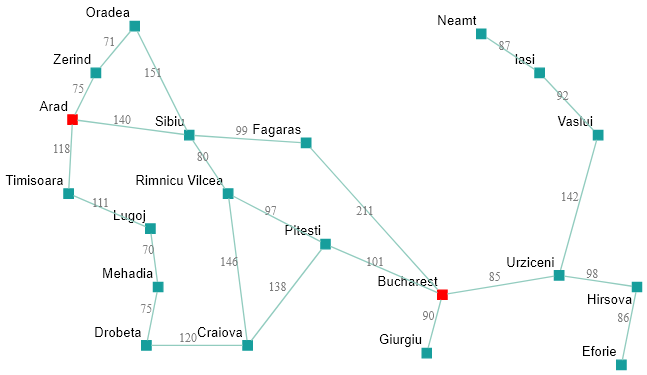

In [25]:
#storing above map info first as a dictionary..
romania_nodes_map = {
        'A': [(140,'S'), (118,'T'),(75,'Z')],
        'S': [(99,'F'), (80,'RV'),(151,'O')],
        'T': [(111,'LU')],
        'Z': [(71,'O')],
        'F': [(211,'B')],
        'B': [(90,'G'),(85,'U')],
        'U':[(98,'H'),(142,'V')],
        'V':[(92,'LA')],
        'LA':[(87,'N')],
        'RV':[(146,'C'),(97,'P')],
        'P':[(101,'B'),(138,'C')],
        'LU':[(70,'M')],
        'M':[(75,'D')],
        'D':[(120,'C')],
        'H':[(86,'E')]
        }

In [27]:
q = PriorityQueue()
start = 'A'
goal = 'B'
q.put((0,start))
cameFrom = {}           #note its a dict, not list caz key needed as string. Its 'kid':'papa'
cameFrom[start] = None  #caz its a starting point in our virtual tree of search!! No papa.
closedSet = set()  # set() would be better than a list?

while not q.empty():
    current_cost, current_path = q.get() #cost is inf, path is ['A']
    current_node = current_path[-1]      #this should give us 'A'

    #Is 'A' is not goal 'B'? 
    if (current_node == goal): 
        break 
    else:
        #if current_node in closedSet: print('Duplicate Avoided')  #just to ensure loops really avoided..
        closedSet.add(current_node)

    for each_children in romania_nodes_map.get(current_node, []):
        q.put((current_cost + each_children[0], each_children[1]))
        cameFrom[each_children[1]]=current_node

    #test
    list(q.queue)

print(current_cost, current_node)
path = [current_node]
while current_node != None:   #when current_node is not None..
    current_node = cameFrom[current_node]
    path.append(current_node)
print(current_cost, [x for x in reversed(path[:-1])])

450 B
450 ['A', 'S', 'F', 'B']


Great! The algorithm now works also for Graphs. :)